In [1]:
import pandas as pd
df = pd.read_csv('../data/raw/original_csv/hyperion.csv')

## Caratteristiche base

In [2]:
print('Numero stralci: ', len(df.index))

n_texts = len(df.index) - df['Testo'].isnull().sum()
print('Numero testi: ', n_texts)

n_classes = df['Repertorio'].nunique()
print('Numero repertori: ', n_classes)



Numero stralci:  35474
Numero testi:  15577
Numero repertori:  35


In [3]:
print('media stralci per testo: ', len(df.index)/n_texts)

media stralci per testo:  2.2773319637927716


In [4]:
print('ESEMPI PER REPERTORIO')
print(df['Repertorio'].value_counts())

ESEMPI PER REPERTORIO
Sancire                     5625
Descrizione                 4882
Commento                    4402
Giudizio                    2758
Valutazione                 2122
Prescrizione                1918
Contrapposizione            1412
Specificazione              1395
Opinione                    1343
Previsione                  1168
Non risposta                1163
Ridimensionamento           1102
Generalizzazione            1065
Implicazione                 705
Dichiarazione di intenti     643
Conferma                     639
Deresponsabilizzazione       638
Possibilità                  616
Causa                        471
Giustificazione              440
Considerazione               312
Proposta                     256
Anticipazione                 53
giudizio                       6
causa                          2
sancire                        2
prescrizione                   2
valutazione                    1
contrapposizione               1
specificazione       

In [5]:
df.groupby('Repertorio')['Repertorio'].count()

Repertorio
Anticipazione                 53
Causa                        471
Commento                    4402
Conferma                     639
Considerazione               312
Contrapposizione            1412
Deresponsabilizzazione       638
Descrizione                 4882
Dichiarazione di intenti     643
Generalizzazione            1065
Giudizio                    2758
Giustificazione              440
Implicazione                 705
Implicazioni                   1
Non risposta                1163
Opinione                    1343
Possibilità                  616
Prescrizione                1918
Previsione                  1168
Previsioni                     1
Proposta                     256
Ridimensionamento           1102
Sancire                     5625
Specificazione              1395
Valutazione                 2122
causa                          2
commento                       1
contrapposizione               1
generalizzazione               1
giudizio                       6

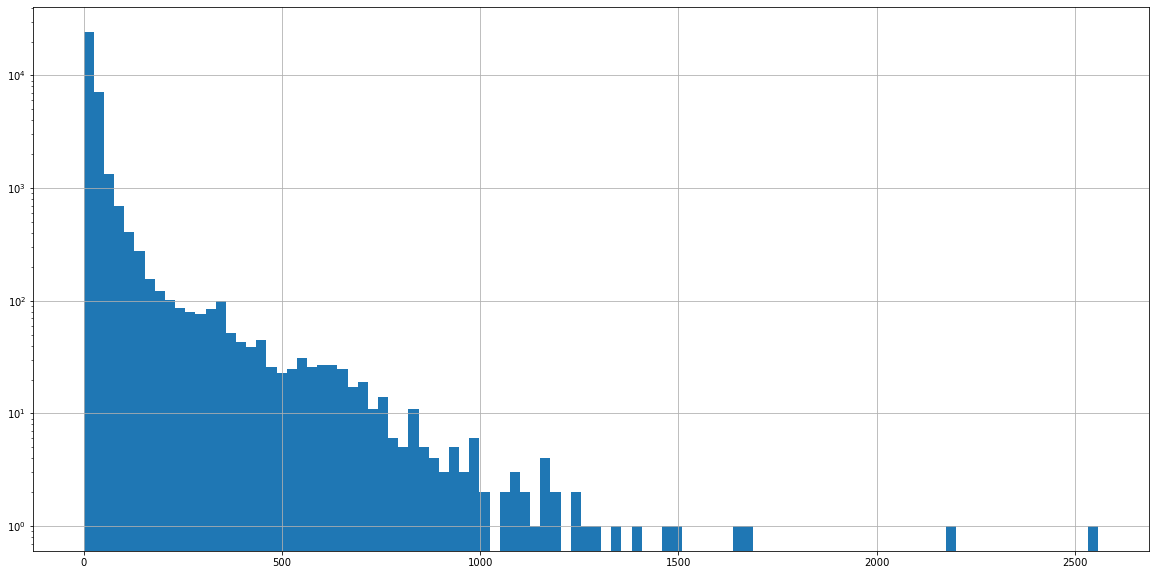

In [6]:
import matplotlib.pyplot as plt

def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(figsize=(20,10), bins=100, log=True)

plot_word_number_histogram(df['Stralcio'])

/Users/michele/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/michele/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


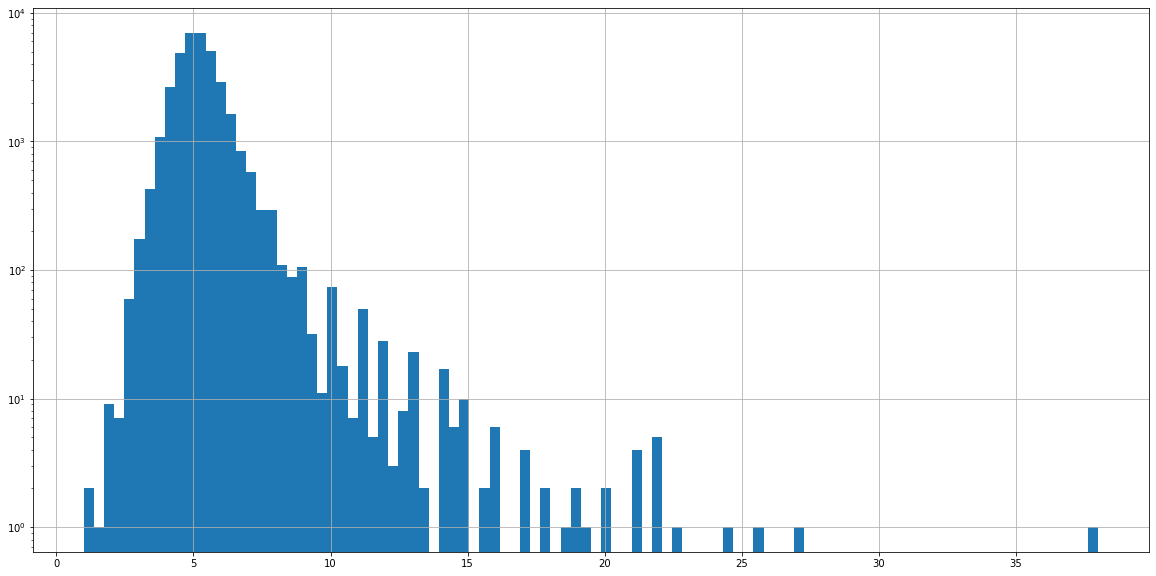

In [7]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist(figsize=(20,10), bins=100, log=True)

plot_word_length_histogram(df['Stralcio'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michele/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


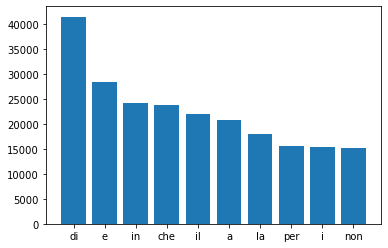

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('italian'))

corpus=[]
new= df['Stralcio'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('italian'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(df['Stralcio'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


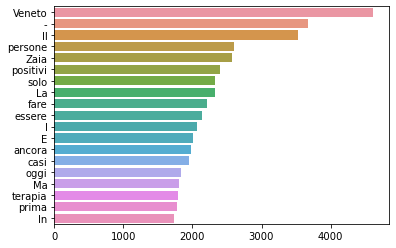

In [10]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('italian'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:70]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['Stralcio'])

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/michele/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

[nltk_data] Downloading package wordnet to /Users/michele/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/michele/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/michele/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


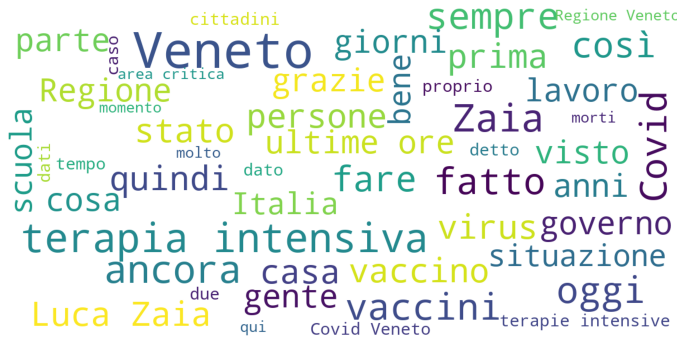

In [12]:
# Code Snippet for Wordcloud

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


def plot_wordcloud(text):
    stop=set(stopwords.words('italian'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus += words
        return corpus
    
    corpus=_preprocess_text(text)
    for w in stop:
        STOPWORDS.add(w)
    
    STOPWORDS.add('dopo')
    STOPWORDS.add('altri')
    STOPWORDS.add('invece')
    STOPWORDS.add('meno')
    STOPWORDS.add('senza')
    STOPWORDS.add('solo')
    STOPWORDS.add('mai')
    STOPWORDS.add('oltre')
    STOPWORDS.add('già')
    STOPWORDS.add('altro')
    STOPWORDS.add('poi')
    STOPWORDS.add('però')
    STOPWORDS.add('quando')
    STOPWORDS.add('essere')
    STOPWORDS.add('os')
    STOPWORDS.add('può')
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=50,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(' '.join(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

plot_wordcloud(df['Stralcio'])

<AxesSubplot:xlabel='Repertorio'>

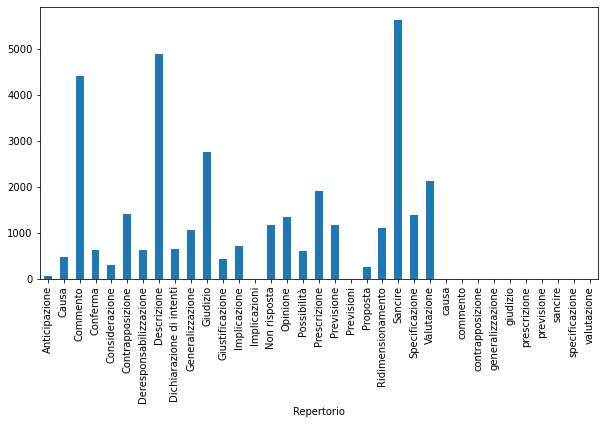

In [13]:
plt.xticks(rotation='vertical')
df = df.sort_values('Repertorio')
df.groupby('Repertorio').size().plot(kind='bar', figsize=(10,5))